# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

---

---

# Assignment Lab 1-2: Text Classification and Data Mining

### Step2: follow the same process from the DM2024-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentiment and comment columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own

---

---

In [131]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [132]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")


In [133]:
#ds infomation
print(ds['train'].column_names)
from collections import Counter

label_counts = Counter(ds['train']['sentiment'])  
print(label_counts)


['sentiment', 'comment']
Counter({'not nostalgia': 750, 'nostalgia': 750})


In [134]:
print(ds['train'][0:2])  # Get the first two data in the training set

{'sentiment': ['not nostalgia', 'nostalgia'], 'comment': ['He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.', 'The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel']}


Let's take a look at some of the records that are contained in our subset of the data

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [135]:
# Get all the different emotion tags
unique_sentiments = set(ds['train']['sentiment'])
print(unique_sentiments)


{'nostalgia', 'not nostalgia'}


In [136]:
len(ds['train'])

1500

#### We can also print an example from the subset

In [137]:
# An example of what the subset contains
print("\n".join(ds['train'][0]['comment'].split("\n")))


He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


... and determine the label of the example via `target_names` key value

In [138]:
# Print the emotion label of the 0th sample
print(ds['train'][0]['sentiment'])

not nostalgia


... we can also get the category of 10 documents via `target` key value 

In [139]:
# sentiment of first 10 documents.
print(ds['train'][0:10]['sentiment'])

['not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia']


**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [140]:
# Print the text data and sentiment labels of the first 3 samples
for i in range(3):
    print(f"Comment: {ds['train'][i]['comment']}")
    print(f"Sentiment: {ds['train'][i]['sentiment']}")
    print()


Comment: He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
Sentiment: not nostalgia

Comment: The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
Sentiment: nostalgia

Comment: I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.
Sentiment: nostalgia



---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [141]:
import pandas as pd
X = pd.DataFrame(ds['train']['comment'], columns=['text'])


In [142]:
len(X)

1500

In [143]:
X[0:2]

text
0  He was a singer with a golden voice that I lov...
1  The mist beautiful voice ever I listened to hi...

In [144]:
for t in X["text"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [145]:
X = pd.DataFrame({
    'text': ds['train']['comment'],
    'sentiment': ds['train']['sentiment']
})


Now we can print and see what our table looks like. 

In [146]:
X[0:10]

text      sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia
5  Every time I heard this song as a child, I use...      nostalgia
6  My dad loved listening to Jim Reeves, when I w...      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia
8           Wherever you  are you always in my heart  not nostalgia
9  Elvis will always be number one no one can com...  not nostalgia

Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [147]:
X[-10:]

text      sentiment
1490  He really isn't my cup of tea, but some of his...  not nostalgia
1491  real music...how i miss those days...brings ba...      nostalgia
1492  i used to cry over this song cause i had a boy...      nostalgia
1493  He really has that "love you like a brother" l...  not nostalgia
1494  That's funny. But Leo really is a nice guy. He...  not nostalgia
1495  i don't know!..but the opening of the video,.....  not nostalgia
1496  it's sad this is such a beautiful song when yo...  not nostalgia
1497  Dear Friend, I think age and time is not that ...  not nostalgia
1498  I was born in 1954 and started to be aware of ...      nostalgia
1499  This is the first CD I bought after my marriag...      nostalgia

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [148]:
# using loc (by label)
X.loc[:10, 'text']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: text, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [149]:
# using iloc (by position)
X.iloc[:10, 0]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [150]:
print(X[X['sentiment'].isin(["nostalgia"])]) #Try to use isin. This usage is to filter out rows whose data matches a set of values.
#Filter data with a category value of 1 or 3

print(X.iat[2, 1]) #Try to use iat, it will only return a single value, instead of returning a data box like .loc[] and .iloc[]
# Select the value in row 1 of column 2

                                                   text  sentiment
1     The mist beautiful voice ever I listened to hi...  nostalgia
2     I have most of Mr. Reeves songs.  Always love ...  nostalgia
4     listening to his songs reminds me of my mum wh...  nostalgia
5     Every time I heard this song as a child, I use...  nostalgia
6     My dad loved listening to Jim Reeves, when I w...  nostalgia
...                                                 ...        ...
1488  Yup !!!!  Bringing back an Enormous amount of ...  nostalgia
1491  real music...how i miss those days...brings ba...  nostalgia
1492  i used to cry over this song cause i had a boy...  nostalgia
1498  I was born in 1954 and started to be aware of ...  nostalgia
1499  This is the first CD I bought after my marriag...  nostalgia

[750 rows x 2 columns]
nostalgia


---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [151]:
print(X[X["sentiment"] == "nostalgia"].iloc[::10][0:5])


                                                 text  sentiment
1   The mist beautiful voice ever I listened to hi...  nostalgia
18  My Grandparents had a pub in the 1970's, this ...  nostalgia
32  I remember my Mom listening to Jim over and ov...  nostalgia
50  If I remember correctly, this song came out af...  nostalgia
71  Gosh does this bring back memories. Nearly eve...  nostalgia


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based approach or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [152]:
# check missing values
X.isnull()

text  sentiment
0     False      False
1     False      False
2     False      False
3     False      False
4     False      False
...     ...        ...
1495  False      False
1496  False      False
1497  False      False
1498  False      False
1499  False      False

[1500 rows x 2 columns]

The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [153]:
#Check the number of missing values for each field in a DataFrame
missing_values = X.isnull().sum()
print(missing_values)

text         0
sentiment    0
dtype: int64


Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [154]:
from helpers import data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [155]:
dummy_series = pd.Series(["dummy_record"], index=["text" ])

In [156]:
dummy_series

text    dummy_record
dtype: object

In [157]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text
0  dummy_record

In [158]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [159]:
# check if the records was commited into result
len(result_with_series)

1501

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [160]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [161]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
              }]

In [162]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [163]:
len(X)

1501

In [164]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [165]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [166]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [167]:
len(X)

1500

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (Skip in step2)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [168]:
#Used to check if there are duplicate rows in a DataFrame
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [169]:
#Here I printed out a few duplicate lines and then found that there was one duplicate line, so I printed it out later.
print(sum(X.duplicated()))
# Show all duplicate rows, including first occurrence of row
duplicated_rows = X[X.duplicated(keep=False)]
print(duplicated_rows)

1
                                                 text      sentiment
62  never heard this song before... WOW What an am...  not nostalgia
78  never heard this song before... WOW What an am...  not nostalgia


We can also check the sum of duplicate records by simply doing:

In [170]:
sum(X.duplicated())

1

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `text` attribute. 

In [171]:
sum(X.duplicated('text'))

1

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [172]:
X_sample = X.sample(n=1000) #random state

In [173]:
len(X_sample)

1000

In [174]:
X_sample[0:4]

text      sentiment
1435  if my future boyfriend sing this song for me, ...  not nostalgia
846   It reminds me of Sunday rides with an ex. Love...      nostalgia
1206  I wanna listen to this song when I get to Hawa...  not nostalgia
390   I was so lucky to grow up in the era, where th...      nostalgia

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [175]:
print(X.describe())          
print(X_sample.describe())  

#In X, the text field has 1499 unique texts, indicating a duplicate. Among the emotion tags, not nostalgia accounts for 750, the largest number.
#In X_sample, text is not repeated, and the emotion label is still not nostalgia that appears the most.



                                                     text      sentiment
count                                                1500           1500
unique                                               1499              2
top     never heard this song before... WOW What an am...  not nostalgia
freq                                                    2            750
                                                     text  sentiment
count                                                1000       1000
unique                                               1000          2
top     Tranent British Legion, 1970's. Loved the club...  nostalgia
freq                                                    1        518


---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
sentiment = ['not nostalgia', 'nostalgia']
sentiment

['not nostalgia', 'nostalgia']

sentiment
nostalgia        518
not nostalgia    482
Name: count, dtype: int64


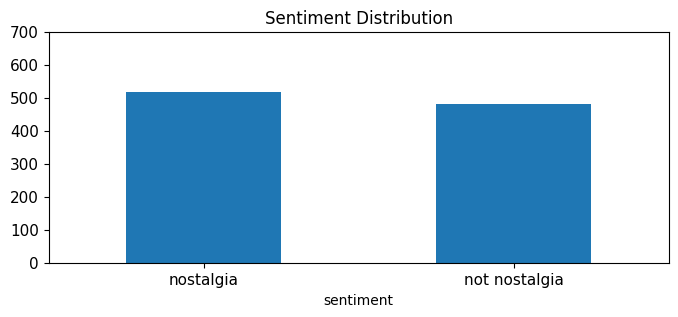

In [178]:
print(X_sample['sentiment'].value_counts())

# 繪製條形圖
X_sample['sentiment'].value_counts().plot(kind='bar',
                                   title='Sentiment Distribution',
                                   ylim=[0, 700],       
                                   rot=0,               
                                   fontsize=11,         
                                   figsize=(8, 3))

# 顯示圖表
plt.show()

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

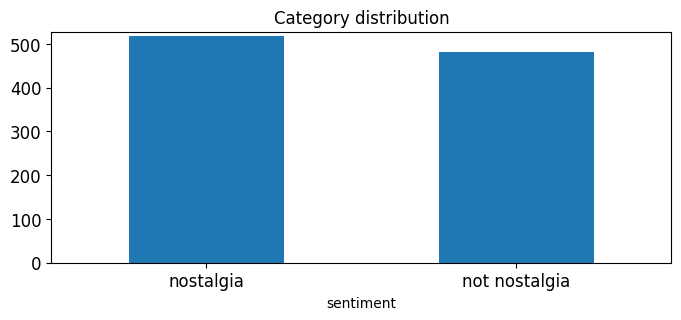

In [179]:
upper_max = max(X_sample['sentiment'].value_counts()+10)
X_sample['sentiment'].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_max],# 0~upper_max
                                           rot = 0, fontsize = 12, figsize = (8,3))#Font size, and box size

---

### >>> **Exercise 8 (Step2 不做):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [180]:
# After comparing the distribution between the original dataset and the sampled dataset, 
# we can observe that the category distribution remains relatively stable.
# For example, the 'soc.religion.christian' and 'sci.med' categories maintain similar proportions in both datasets.
# This indicates that the random sampling process preserved the overall distribution of categories well, 
# which is important for ensuring that the sampled dataset is representative of the original dataset.

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

```python
import nltk
```

In [181]:
import nltk

In [182]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [183]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [184]:
X[0:4]

text      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [185]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [186]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

Now you can also see some examples of what each feature is based on their index in the vector:

In [187]:
#The 3278th word in the entire vocabulary is repeated once in the first row.
count_vect.get_feature_names_out()[3278]

'thank'

In [188]:
count_vect.get_feature_names_out()[2018]

'lord'

In [189]:
count_vect.get_feature_names_out()[3713]

'you'

In [190]:
count_vect.get_feature_names_out()[3284]

'the'

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [191]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [192]:
#I discovered that the turban will still exist and will not be shaved off
analyze("The higher we climbed on the mountain, the colder the weather became.")

['the',
 'higher',
 'we',
 'climbed',
 'on',
 'the',
 'mountain',
 'the',
 'colder',
 'the',
 'weather',
 'became']

---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [193]:
analyze(X.text[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---

Now let us look at the term-document matrix we built above.

In [194]:
# We can check the shape of this matrix by:
X_counts.shape

(1500, 3730)

In [195]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [196]:
X_counts.shape

(1500, 3730)

In [197]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [198]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [199]:
import numpy as np

fifth_text_row = X_counts[4].toarray().flatten()

one_indices = np.where(fifth_text_row == 1)[0]

feature_names = count_vect.get_feature_names_out()

for idx in one_indices[:2]:
    print(f"Column {idx} corresponds to the word: '{feature_names[idx]}'")


Column 1182 corresponds to the word: 'everyday'
Column 1646 corresponds to the word: 'him'


---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [200]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [201]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [202]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

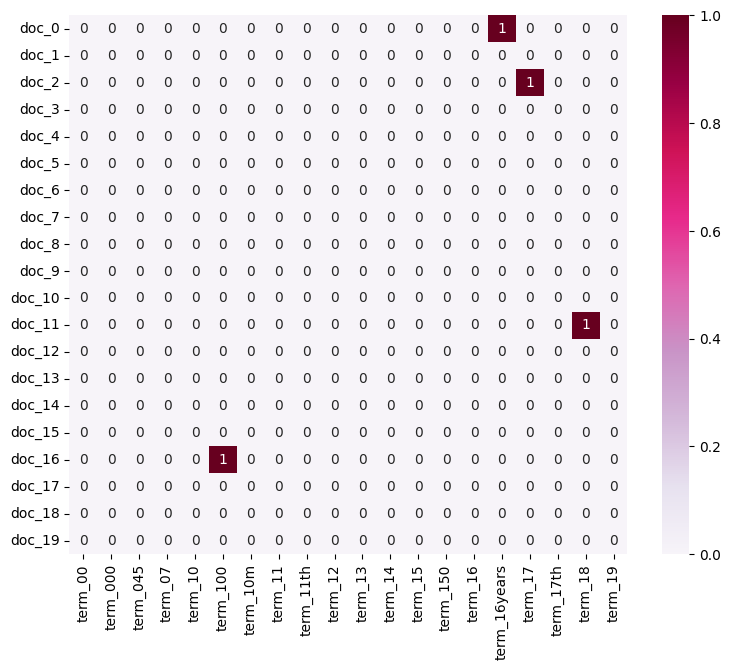

In [203]:
#Top 20 words as X coordinate
#First 20 documents as Y coordinate
#Draw a 20x20 word frequency matrix showing the number of times these words appear in these documents
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

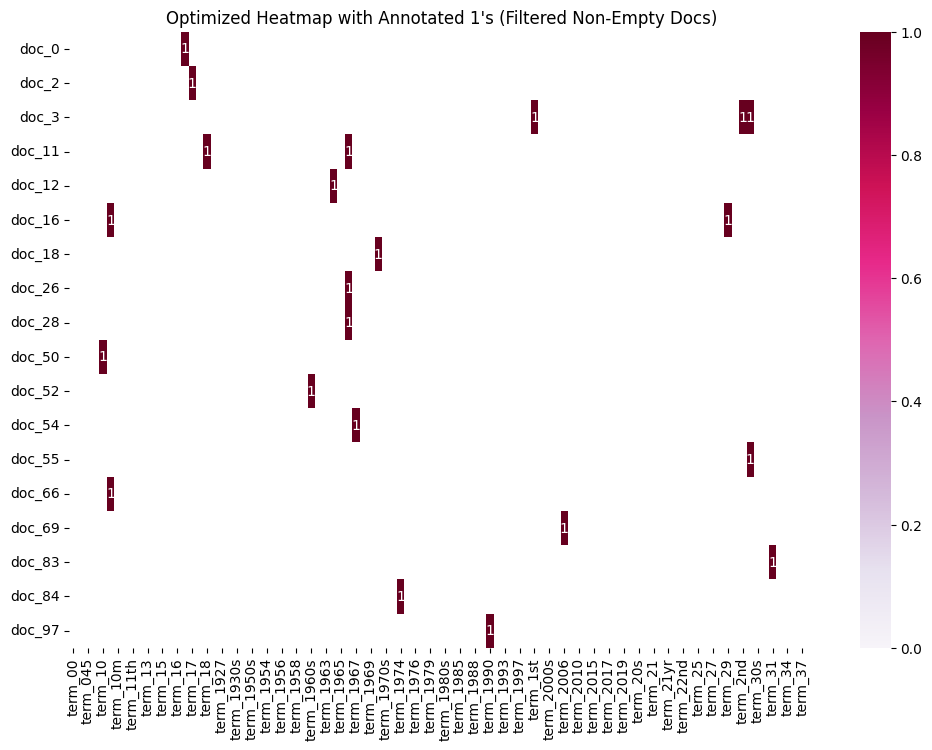

In [204]:
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:100]]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:100]]
plot_z = X_counts[0:100, 0:100].toarray().astype(float)

#Display only parts with value 1, set other parts to NaN
plot_z[plot_z == 0] = np.nan

# Calculate the sum for each document and keep only documents with a sum greater than 0
doc_sums = np.nansum(plot_z, axis=1)  # Calculate the sum of each row
non_empty_docs = np.where(doc_sums > 0)[0]  # Find document indexes whose sum is greater than 0

# filtered
plot_z_filtered = plot_z[non_empty_docs, :]
plot_y_filtered = [plot_y[i] for i in non_empty_docs]  

# create DataFrame 
df_todraw = pd.DataFrame(plot_z_filtered, columns=plot_x, index=plot_y_filtered)

plt.subplots(figsize=(12, 8))  
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",  
                 vmin=0, vmax=1,  
                 annot=True,
                 fmt=".0f",  
                 cbar=True) 

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Optimized Heatmap with Annotated 1's (Filtered Non-Empty Docs)")
plt.show()
#Only keep those documents where words appear, which can reduce meaningless blank documents and make the visualization more focused.

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [205]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [206]:
term_frequencies[0] #Returns the number of occurrences of the first word in the vocabulary across all documents

np.int64(1)

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\2941008.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



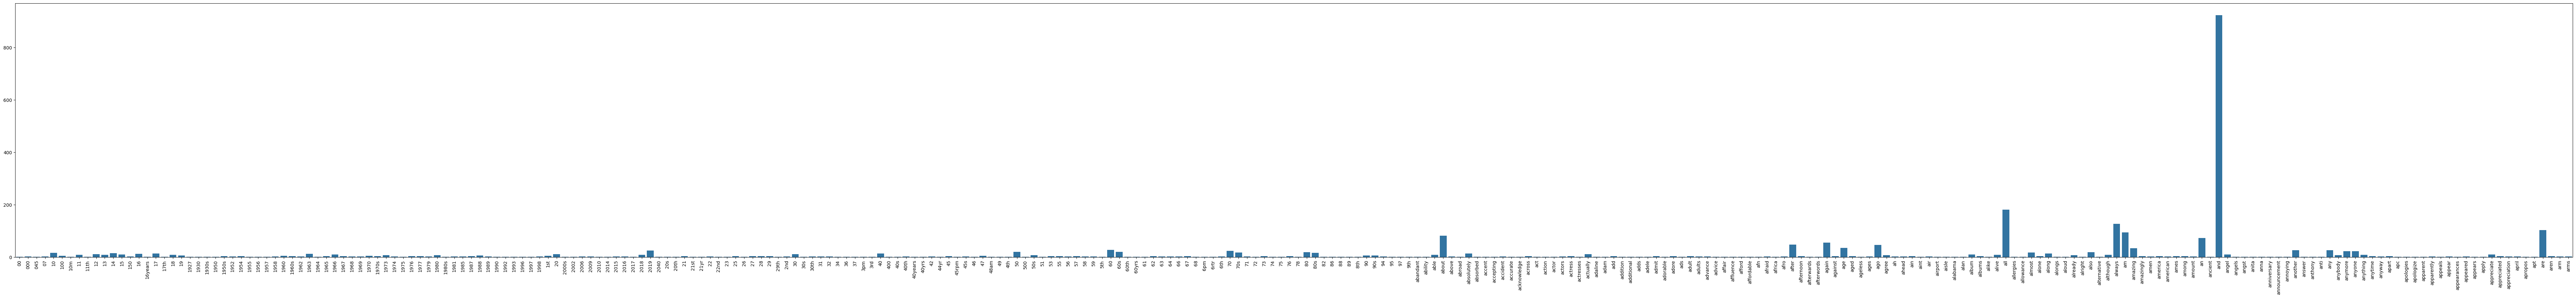

In [207]:
#The X-axis is the first 300 words in the vocabulary,and the Y-axis is the number of times these words appear in all documents (word frequency)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [208]:
import plotly.express as px
import pandas as pd

#use plotly
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:300],  
    'frequency': term_frequencies[:300]  
})

fig = px.bar(df, x='term', y='frequency', title='Top 300 Term Frequencies')
fig.update_layout(xaxis_tickangle=-90)
fig.show()


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [209]:
#Set an additional variable to control the number I want
#Set xaxis_tickangle=-45Make visualization more obvious
N = 100  #set high-frequency words
df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:N],  
    'frequency': term_frequencies[:N]  #Get the corresponding frequencies of the first N words
})

fig = px.bar(df, x='term', y='frequency', title=f'Top {N} Term Frequencies')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [210]:
import plotly.express as px
import pandas as pd

#Set an additional variable to control the number I want
N = 100  


df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:N], 
    'frequency': term_frequencies[:N]  # Get the corresponding frequencies of the first N words
})

# Use sort_values to sort
df = df.sort_values(by='frequency', ascending=False)

#Create a bar chart with the X-axis being the sorted words
fig = px.bar(df, x='term', y='frequency', title=f'Top {N} Term Frequencies Sorted by Frequency')
fig.update_layout(xaxis_tickangle=-45)
fig.show()




---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [211]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



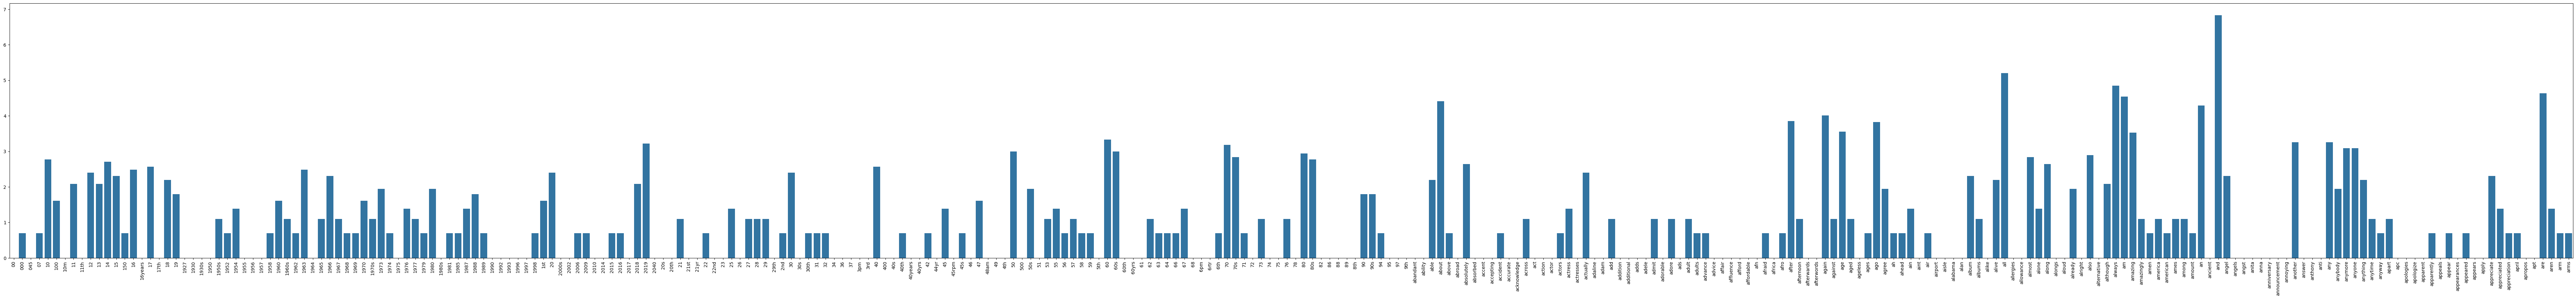

In [212]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [213]:
import plotly.express as px
import pandas as pd

#Set an additional variable to control the number I want
N = 100  


df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:N], 
    'frequency': term_frequencies_log[:N]  # Get the corresponding frequencies of the first N words
})

# Use sort_values to sort
df = df.sort_values(by='frequency', ascending=False)

#Create a bar chart with the X-axis being the sorted words
fig = px.bar(df, x='term', y='frequency', title=f'Top {N} Term Frequencies Sorted by Frequency')
fig.update_layout(xaxis_tickangle=-45)
fig.show()




###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

**Introduction to PAMI**

PAMI (PAttern MIning) is a Python-based library designed to empower data scientists by providing the necessary tools to uncover hidden patterns within large datasets. Unlike other pattern mining libraries that are Java-based (such as WEKA and SPMF), PAMI caters specifically to the Python environment, making it more accessible for data scientists working with Big Data. The goal of PAMI is to streamline the process of discovering patterns that are often hidden within large datasets, offering a unified platform for applying various pattern mining techniques. In the library you can find a lot of implementations from current state-of-the-art algorithms, all of them cater to different type of data, they can be: transactional data, temporal data, utility data and some others. You can find more information in the following github: [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file). For the purpose of our lab we will be modeling our text data as a transactional type. So let's get into it.

**Transactional Data**

In order to apply pattern mining techniques, we first need to convert our text data into transactional data. A transactional database is a set of transactions where each transaction consists of a unique identifier (TID) and a set of items. For instance, think of a transaction as a basket of items purchased by a customer, and the TID is like the receipt number. Each transaction could contain items such as "apple", "banana", and "orange".

Here's an example of a transactional database:

TID	Transactions
1	a, b, c
2	d, e
3	a, e, f

In this structure:
TID refers to the unique identifier of each transaction (often ignored by PAMI to save storage space).
Items refer to the elements in each transaction, which could be either integers or strings (e.g., products, words, etc.).
When preparing text data, we need to transform sentences or documents into a similar format, where each sentence or document becomes a transaction, and the words within it become the items.

**Frequent Pattern Mining**

After converting the text into a transactional format, we can then apply frequent pattern mining. This process identifies patterns or combinations of items that occur frequently across the dataset. For example, in text data, frequent patterns might be common word pairs or phrases that appear together across multiple documents. Important term to learn: **Minimum Support**: It refers to the minimum frequency that a transaction has to have to be considered a pattern in our scenario.

PAMI allows us to mine various types of patterns, but for the purpuse of this lab we will explore the following types:


**Patterns Above Minimum Support:** These are all patterns that meet a specified minimum support threshold. The result set can be quite large as it includes all frequent patterns, making it ideal for comprehensive analysis but potentially complex.

**Maximal Frequent Patterns:** These are the largest frequent patterns that cannot be extended by adding more items without reducing their frequency below the minimum support threshold. The result set is smaller and more concise, as it only includes the largest patterns, reducing redundancy.

**Top-K Frequent Patterns:** These patterns represent the K most frequent patterns, regardless of the minimum support threshold. The result set is highly focused and concise, with a fixed number of patterns, making it ideal when prioritizing the most frequent patterns.

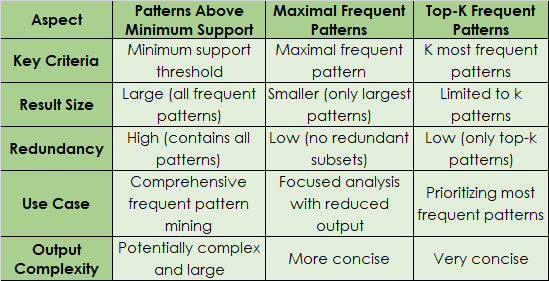

In the following steps, we will guide you through how to convert text data into transactional form and mine frequent patterns from it.


In our scenario, what we need is to mine patterns that can be representative to **each category**, in this way we will be able to differentiate each group of data more easily, for that we will need to first modify our document-term matrix to be able to work for each category, for this we will do the following:

In [214]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [215]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

Now we can see the number of unique words per category based on the column number in the new dataframe, feel free to **explore the changes of each category changing the vector number at the end**.

In the past sections we saw the behaviour of each word frequency in the documents, but we still want to generalize a little bit more so we can observe and determine the data that we are going to use to mine the patterns. For this we will group the terms in bins and we are going to plot their frequency. Again, feel free to change the category number to explore the different results.

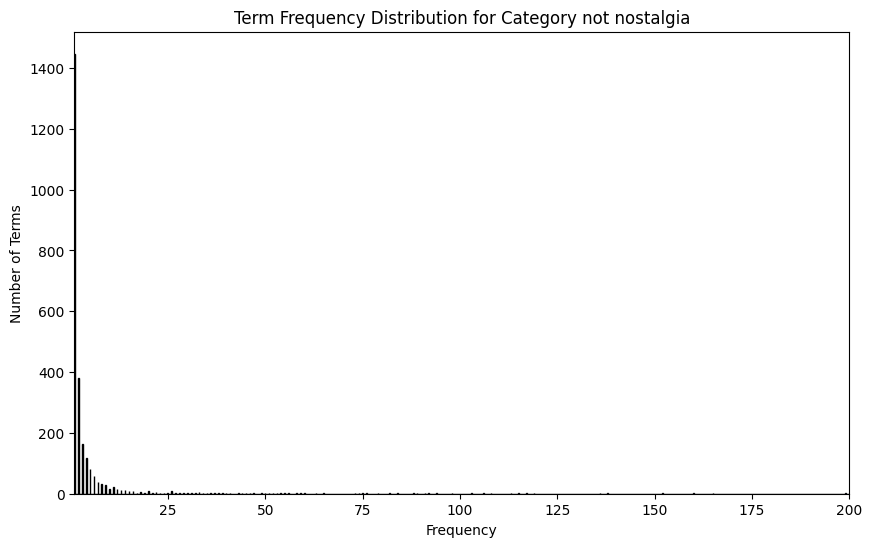

In [216]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

From this graph, we can see that most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often. When we're trying to find patterns in text data, we focus on combinations of words that are most helpful for classifying the documents. However, very rare words or extremely common words (like stopwords: 'the,' 'in,' 'a,' 'of,' etc.) don’t usually give us much useful information. To improve our results, we can filter out these words. Specifically, we'll remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

In this case, the choice of filtering the top 5% and bottom 1% is **arbitrary**, but in other applications, domain knowledge might guide us to filter words differently, depending on the type of text classification we're working on.

Let us look first at the words that we will be filtering based on the set percentage threshold.

In [217]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'not', 'on', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'songs', 'as', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'are', 'at', 'good', 'always', 'no', 'never', 'know', 'now', 'much', 'about', 'who', 'really', 'if', 'more', 'we', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'how', 'only', 'don', 'has', 'very', 'there', 'am', 'out', 'these', 'him', 'could', 'an', 'old', 'up', 'listen', 'hear', 'do', 'singer', 'had', 'many', 'here', 'such', 'today', 'too', 'version', 'been', 'your', 'heard', 'people', 'most', 'world', 'get', 'man', 'some', 'video', 'sing', 'listening', 'than', 'real', 'were', 'years', 'nice', 'heart', 'singing', 'life', 'their', 'better', 'day', 'its', 'sad', 'why', 'those', 'way', 

Here we can explore the frequencies of the **top 5%** words:

In [218]:
sorted_counts #We can see the frequencies sorted in a descending order
#output mean the most common word occurs a total of 708 times across all documents
#the second common word occurs a total of 453 times across all documents

array([708, 453, 451, ...,   1,   1,   1])

In [219]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order
#The most frequent word is in index 2276
#The second most frequent word is in index 2290


array([2276, 2290,  160, ...,   34,   32,   31])

In [220]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(708)

In [221]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['1970', '1973', '1981', '1987', '1989', '1998', 'wouldn', 'wrenching', '4th', '500', '1955', '1957', '1960s', '1963', '1965', '1969', '30s', '30th', '32', '37', '400', '40s', '42', '47', '2010', '2017']


Here we can explore the frequencies of the **bottom 1%** words:

In [222]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 453, 708])

In [223]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([  31,   32,   34, ...,  160, 2290, 2276])

Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

In [224]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
1970         1
1973         1
1981         1
1987         1
1989         1
1998         1
wouldn       1
wrenching    1
4th          1
500          1
1955         1
1957         1
1960s        1
1963         1
1965         1
1969         1
30s          1
30th         1
32           1
37           1
400          1
40s          1
42           1
47           1
2010         1
2017         1
dtype: int64
Top 5.0% words: 
first       23
them        23
amazing     24
wish        24
any         25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
1964          1
1969          1
1975          1
1980s         1
1981          1
wonderfull    1
wood          1
working       1
mad           1
maddox        1
madrid        1
maggie        1
1927          1
1950          1
1952       

00  000  045  10  100  10m  11  12  14  15  ...  younger  youngest  \
0     0    0    0   0    0    0   0   0   0   0  ...        0         0   
1     0    0    0   0    0    0   0   0   0   0  ...        0         0   
2     0    0    0   0    0    0   0   0   0   0  ...        0         0   
3     0    0    0   0    0    0   0   0   0   0  ...        0         0   
4     0    0    0   0    0    0   0   0   0   0  ...        0         0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...      ...       ...   
745   0    0    0   0    0    0   0   0   0   0  ...        0         0   
746   0    0    0   0    0    0   0   0   0   0  ...        0         0   
747   0    0    0   0    0    0   0   0   0   0  ...        0         0   
748   0    0    0   0    0    0   0   0   0   0  ...        0         0   
749   0    0    0   0    0    0   0   0   0   0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

# Answer for Exercise 16:

### Summary:

#### Low-frequency words:

- **Similarity**: In both categories, year-related words are the most common low-frequency words. This suggests that these years are specific to certain documents and are not the main focus of all texts.
- **Difference**: The nostalgic category has more low-frequency words that relate to specific people, places, and objects, while the non-nostalgic category contains more numbers, times, or ranking-related words.

#### High-frequency words:

- **Similarity**: Both categories have a large number of common functional words like "the," "and," and "this." These are typical high-frequency grammatical words that appear frequently in everyday language.
- **Difference**: The high-frequency words in the nostalgic category are more related to past memories and emotions, while the non-nostalgic category emphasizes current emotional evaluations and future expectations.



Great! Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.

A key step in this process is defining the threshold that determines when a value in the data is considered a transaction. As we observed in the previous cell, there are **many zeros** in our dataframe, which indicate that certain words do not appear in specific documents. With this in mind, we'll set the transactional threshold to be **greater than or equal to 1**. This means that for each document/transaction, we will include all the words that occur at least once (after filtering), ensuring that only relevant words are included in the pattern mining process. For your reference you can also check the following real world example that the PAMI library provides to review how they chose the threshold to generate the transactional data: [Air Pollution Analytics - Japan](https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb). 

#### The next part of the code will take a couple of minutes to execute, for simplicity I already shared the resulting files from it, to continue onwards

In [225]:
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Now let us look into the stats of our newly created transactional databases, we will observe the following:

- **Database Size (Total Number of Transactions)**: Total count of transactions in the dataset.

- **Number of Items**: Total count of unique items available across all transactions.

- **Minimum Transaction Size**: Smallest number of items in any transaction, indicating the simplest transaction.

- **Average Transaction Size**: Mean number of items per transaction, showing the typical complexity.

- **Maximum Transaction Size**: Largest number of items in a transaction, representing the most complex scenario.

- **Standard Deviation of Transaction Size**: Measures variability in transaction sizes; higher values indicate greater diversity.

- **Variance in Transaction Sizes**: Square of the standard deviation, providing a broader view of transaction size spread.

- **Sparsity**: Indicates the proportion of possible item combinations that do not occur, with values close to 1 showing high levels of missing combinations.

With regards to the graphs we will have: 

- **Item Frequency Distribution**
    - Y-axis (Frequency): Number of transactions an item appears in.
    - X-axis (Number of Items): Items ranked by frequency.

- **Transaction Length Distribution**
    - Y-axis (Frequency): Occurrence of transaction lengths.
    - X-axis (Transaction Length): Number of items per transaction.

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.227146505233723
Variance in Transaction Sizes : 52.30290397046961
Sparsity : 0.9959733855996001


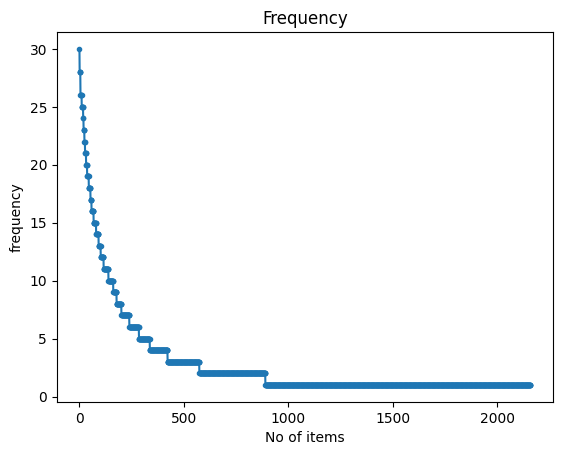

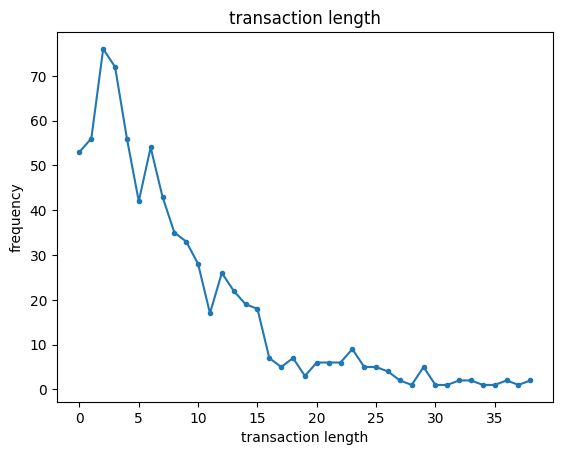

In [226]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 747
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.390896921017402
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.931995031942163
Variance in Transaction Sizes : 35.23573471724252
Sparsity : 0.9965695433683494


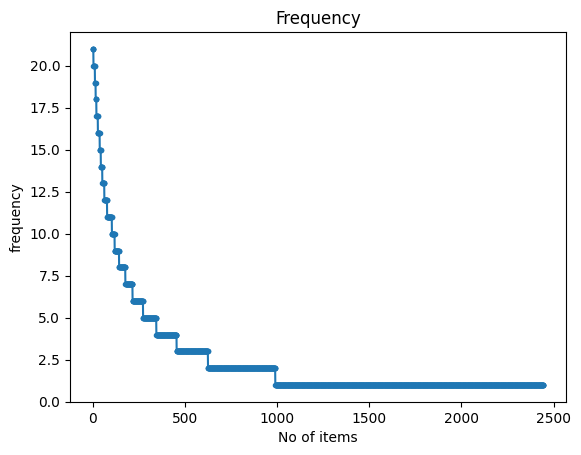

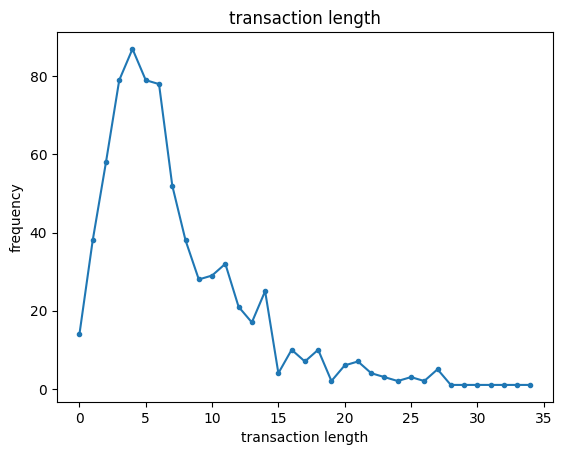

In [227]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Now that we have reviewed the stats of our databases, there are some things to notice from them, the total number of transactions refer to the amount of documents per category, the number of items refer to the amount of unique words encountered in each category, the transaction size refers to the amount of words per document that it can be found, and we can see that our databases are very sparse, this is the result of having many zeros in the first place when making the document-term matrix. 

Why are these stats important? It is because we are going to use the FPGrowth algorithm from PAMI, and for that we need to determine the *minimum support* (frequency) that our algorithm will use to mine for patterns in our transactions. 

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 9. We have done this after observing the following:

- **Item Frequency**: The first graph shows that most items don't appear very often in transactions. There's a sharp drop in how frequently items appear, which means our data has many items that aren't used much.

- **Transaction Length**: The second graph shows that most transactions involve a small number of items. The most common transaction sizes are small, which matches our finding that the dataset does not group many items together often.

By setting minSup at 9, we focus on combinations of items that show up in these smaller, more common transactions. This level is low enough to include items that show up more than just a few times, but it's high enough to leave out patterns that don't appear often enough to be meaningful. This helps us keep our results clear and makes sure the patterns we find are useful and represent what's really happening in the dataset. 

**This value works for all categories**. Now let's get into mining those patterns. For more information you can visit the FPGrowth example in PAMI for transactional data: [FPGrowth Example](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/basic/FPGrowth.ipynb#scrollTo=pLV84IYcDHe3).

# Assignment Lab 1-3: Text Classification and Data Mining

### Step3: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to
this Scikit-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might
need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. Refer to this article


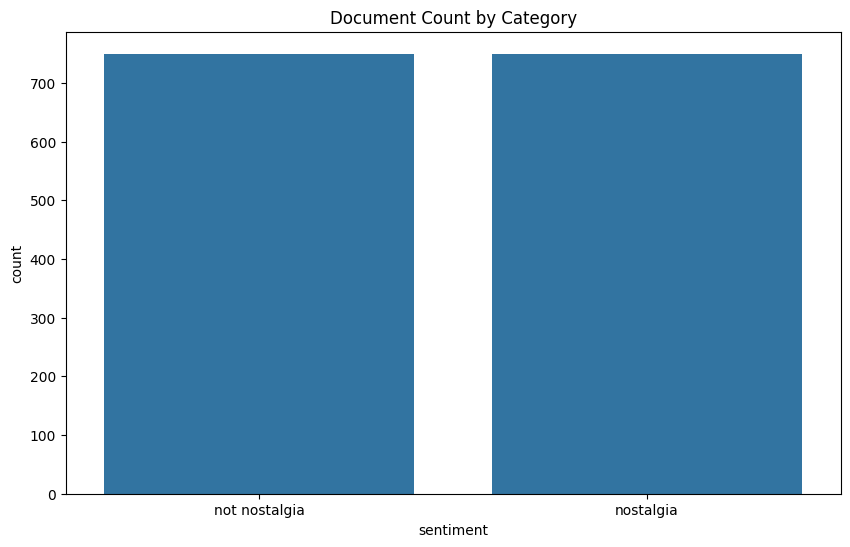

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=X)
plt.title('Document Count by Category')
plt.show()


In [229]:
#If this part is run, the word set will be removed from the bottom 1.0% words and the top 5% words.
#filtered_vocabulary = term_document_dfs[categories[category_number]].columns.tolist()
#count_vect = CountVectorizer(vocabulary=filtered_vocabulary)

In [230]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create term frequency and TF-IDF feature matrices
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

# Convert text into term frequency and TF-IDF feature matrices
X_counts = count_vect.fit_transform(X['text'])  
X_tfidf = tfidf_vect.fit_transform(X['text'])  
Y = X['sentiment']  # Y contains the labels, e.g., 'nostalgia', 'not nostalgia'

# Split the dataset into training set and test set
X_train_count, X_test_count, y_train, y_test = train_test_split(X_counts, Y, test_size=0.3, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, Y, test_size=0.3, random_state=42)

# Use MultinomialNB to train a classifier based on word frequency features
clf_count = MultinomialNB()
clf_count.fit(X_train_count, y_train)
y_pred_count = clf_count.predict(X_test_count)
count_accuracy = accuracy_score(y_test, y_pred_count)

# Use MultinomialNB to train a classifier based on TF-IDF features
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)

# Define the target class names
target_names = ['nostalgia', 'not nostalgia']

# Print out the accuracy and classification report for word frequency features
print(f"Accuracy (Word Frequency features): {count_accuracy}")
print("\nClassification Report (Word Frequency features):\n")
print(classification_report(y_test, y_pred_count, target_names=target_names, digits=4))

# Print out the accuracy and classification report for TF-IDF features
print(f"Accuracy (TF-IDF features): {tfidf_accuracy}")
print("\nClassification Report (TF-IDF features):\n")
print(classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))


Accuracy (Word Frequency features): 0.8422222222222222

Classification Report (Word Frequency features):

               precision    recall  f1-score   support

    nostalgia     0.7917    0.9289    0.8548       225
not nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450

Accuracy (TF-IDF features): 0.8488888888888889

Classification Report (TF-IDF features):

               precision    recall  f1-score   support

    nostalgia     0.7985    0.9333    0.8607       225
not nostalgia     0.9198    0.7644    0.8350       225

     accuracy                         0.8489       450
    macro avg     0.8591    0.8489    0.8478       450
 weighted avg     0.8591    0.8489    0.8478       450



From the results, the accuracy of using TF-IDF features is slightly higher than that of word frequency features.

Although word frequency can directly reflect the frequency of a word in a text, it does not take into account that some words may appear frequently in multiple documents, which will cause some common words to have too much influence on classification. TF-IDF reduces the influence of global common words on classification and emphasizes words with value in individual texts, which may be more effective for sentiment classification.

## Below is a comparison of filtered and unfiltered images.
It can be seen that the accuracy of the word frequency features after filtering is lower.It would be better if this part is not filtered.  
The left side is removed from the bottom 1.0% words and the top 5% words.  
The right side is unfiltered.


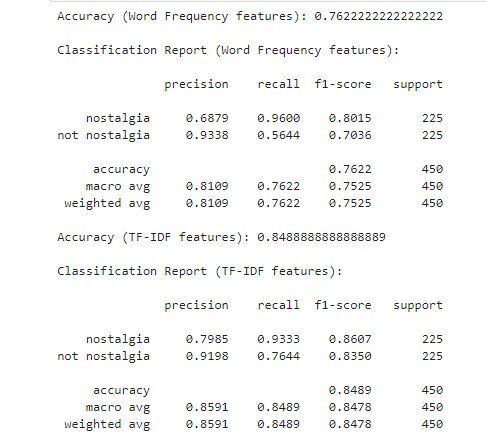
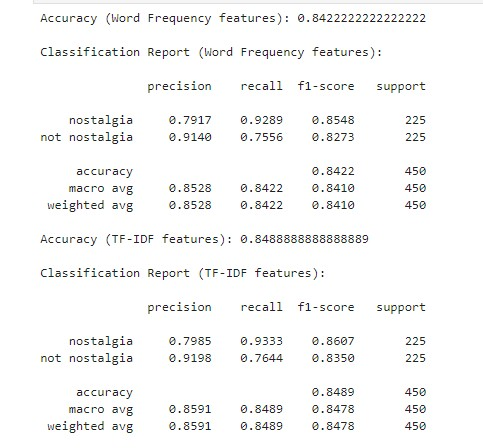

In [231]:
!pip install wordcloud

## Visualize with word clouds

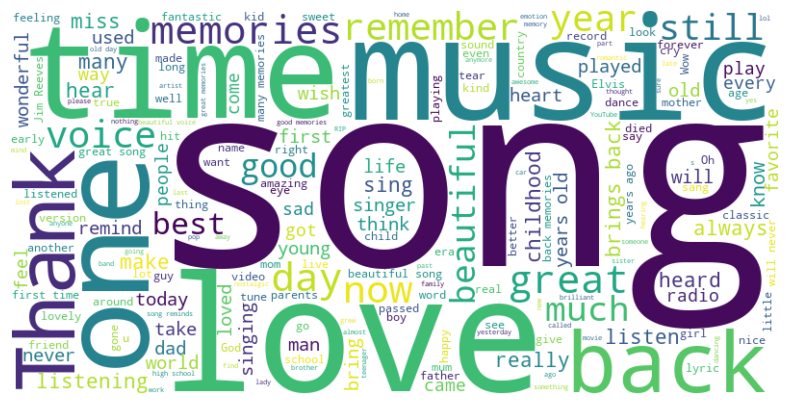

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Draw a graph using the newly generated TF-IDF feature matrix

C:\ProgramData\anaconda3\envs\data_mining\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



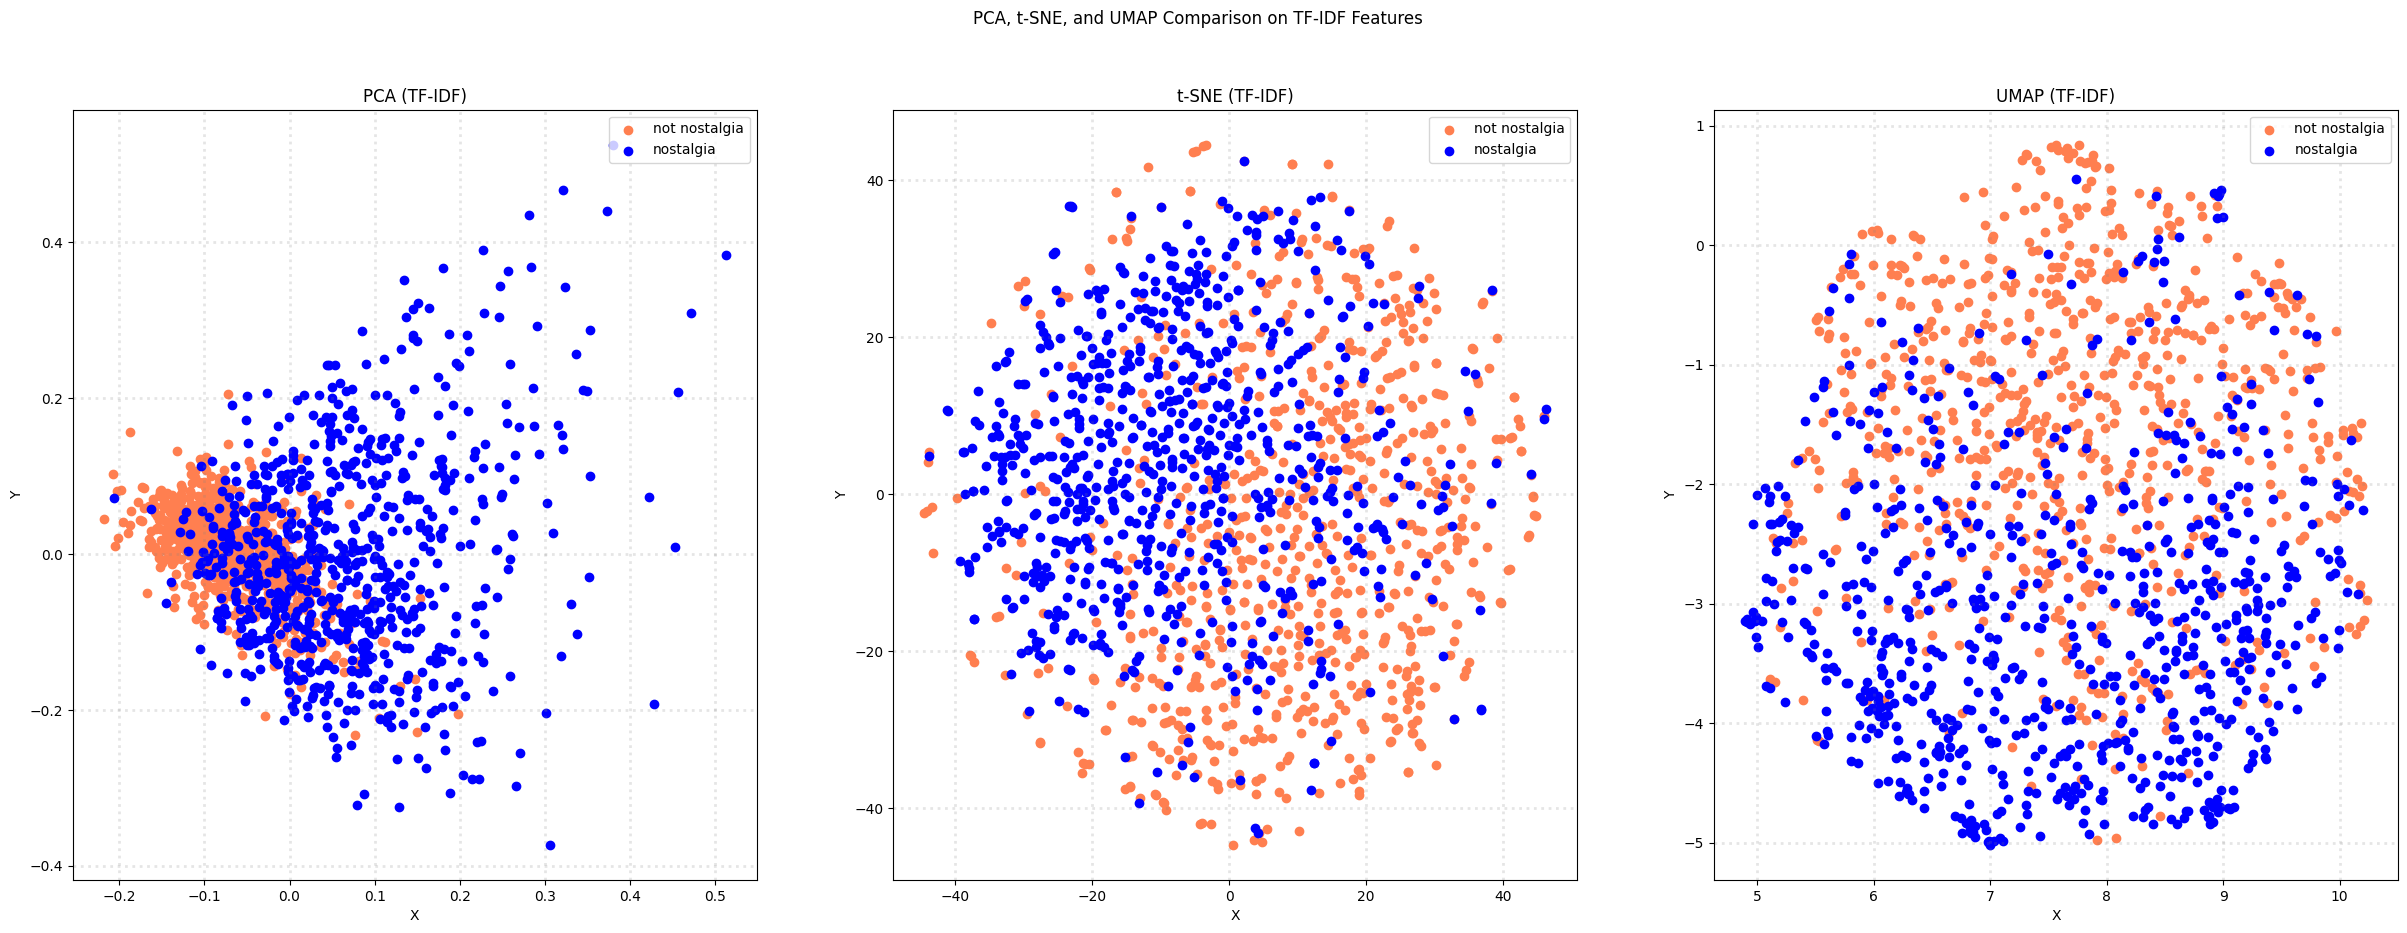

In [233]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

categories = X['sentiment'].unique() 
col = ['coral', 'blue', 'black', 'orange']

# Step 1: Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca_tfidf = pca.fit_transform(X_tfidf.toarray())

# Step 2: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne_tfidf = tsne.fit_transform(X_tfidf.toarray())

# Step 3: Dimensionality reduction using UMAP 
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap_tfidf = umap_model.fit_transform(X_tfidf.toarray())

# Step 4: plot
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # 創建三個子圖：PCA、t-SNE 和 UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison on TF-IDF Features')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 5: Draw a graph using the newly generated TF-IDF feature matrix
plot_scatter(axes[0], X_pca_tfidf, 'PCA (TF-IDF)')
plot_scatter(axes[1], X_tsne_tfidf, 't-SNE (TF-IDF)')
plot_scatter(axes[2], X_umap_tfidf, 'UMAP (TF-IDF)')

plt.show()

### Draw a 3D graph using the newly generated TF-IDF feature matrix

C:\ProgramData\anaconda3\envs\data_mining\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



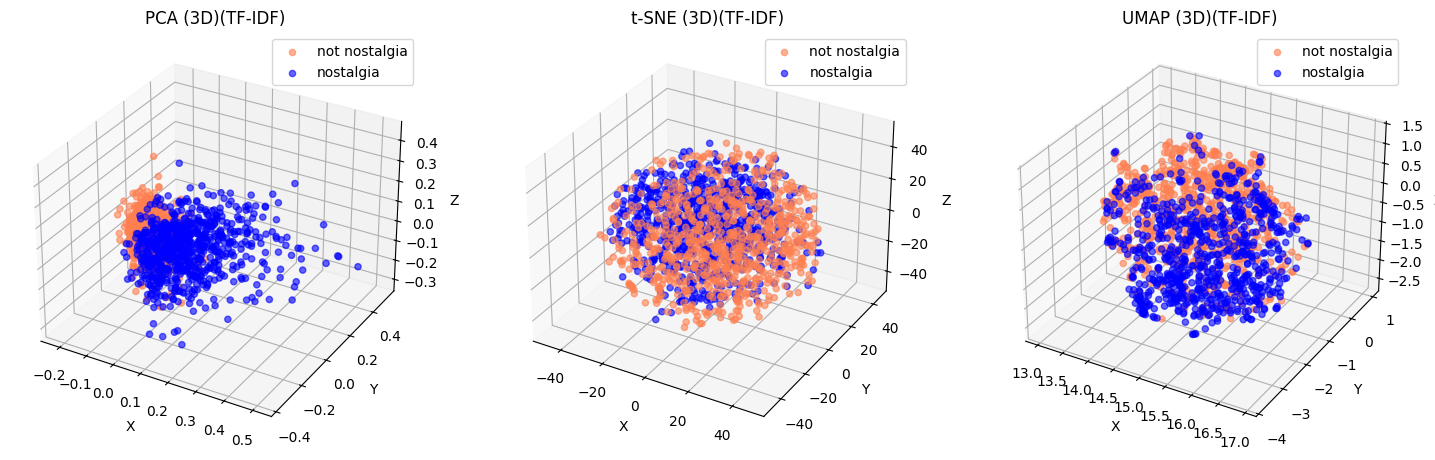

In [234]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Define a function to create 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title, col, categories):
    for c, color in zip(categories, col):
        xs = X_reduced[X['sentiment'] == c][:, 0]
        ys = X_reduced[X['sentiment'] == c][:, 1]
        zs = X_reduced[X['sentiment'] == c][:, 2]
        ax.scatter(xs, ys, zs, c=color, label=c, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Prepare colors and categories
col = ['coral', 'blue', 'black', 'orange']  # You can adjust these colors according to your categories
categories = X['sentiment'].unique()

# Step 1: Dimensionality reduction using PCA in 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_tfidf.toarray())

# Step 2: Dimensionality reduction using t-SNE in 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(X_tfidf.toarray())

# Step 3: Dimensionality reduction using UMAP in 3D
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_model.fit_transform(X_tfidf.toarray())

# Create subplots for PCA, t-SNE, and UMAP in 3D
fig = plt.figure(figsize=(18, 12))

# First plot for PCA
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_3d, 'PCA (3D)(TF-IDF)', col, categories)

# Second plot for t-SNE
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_3d, 't-SNE (3D)(TF-IDF)', col, categories)

# Third plot for UMAP
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_3d, 'UMAP (3D)(TF-IDF)', col, categories)

plt.show()


### Draw a graph using the word frequency features feature matrix

C:\ProgramData\anaconda3\envs\data_mining\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



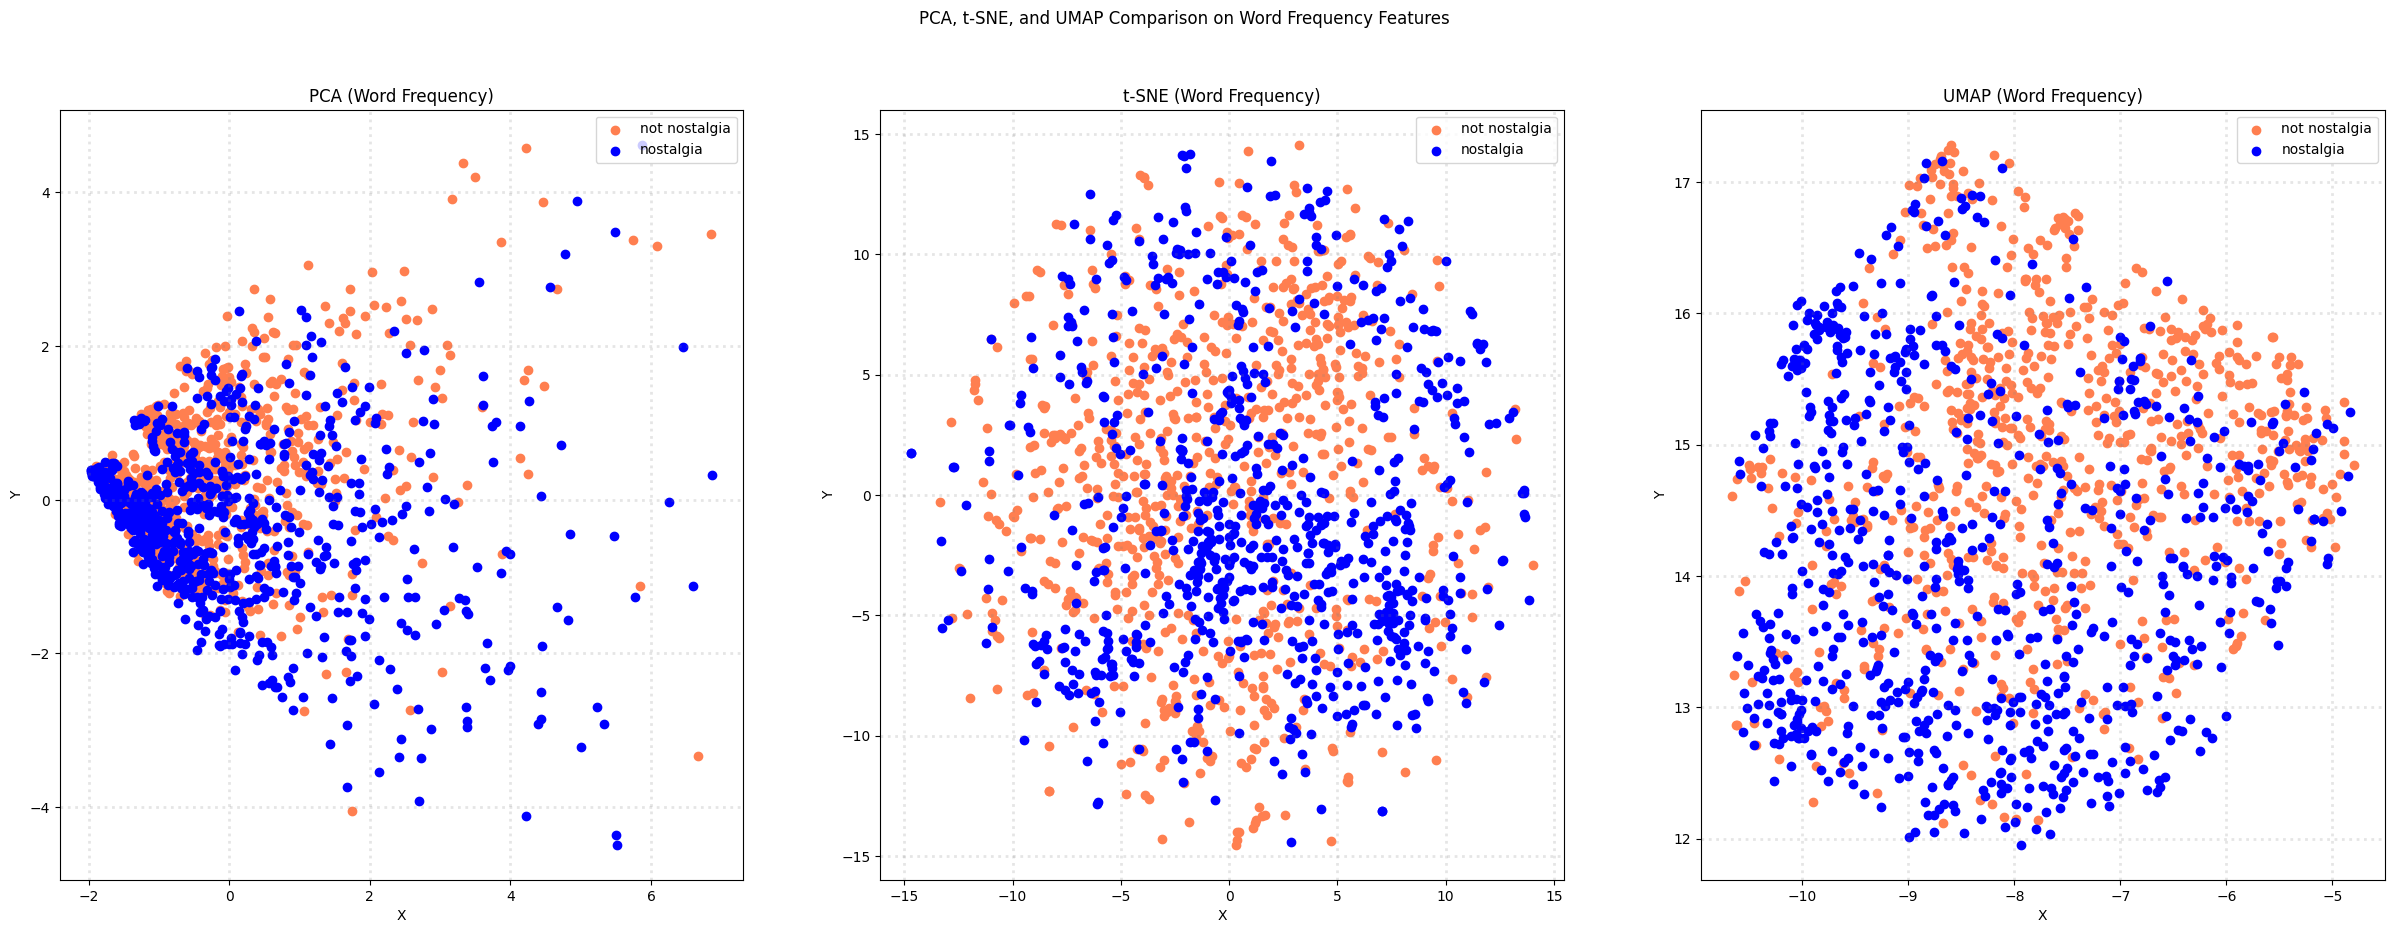

In [235]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 獲取類別名稱
categories = X['sentiment'].unique() 
col = ['coral', 'blue', 'black', 'orange']

# Step 1: Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca_count = pca.fit_transform(X_counts.toarray())

# Step 2: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne_count = tsne.fit_transform(X_counts.toarray())

# Step 3: Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap_count = umap_model.fit_transform(X_counts.toarray())

# Step 4: plot
fig, axes = plt.subplots(1, 3, figsize=(30, 10)) # Create fig
fig.suptitle('PCA, t-SNE, and UMAP Comparison on Word Frequency Features')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 5: Plotting using word frequency features
plot_scatter(axes[0], X_pca_count, 'PCA (Word Frequency)')
plot_scatter(axes[1], X_tsne_count, 't-SNE (Word Frequency)')
plot_scatter(axes[2], X_umap_count, 'UMAP (Word Frequency)')

plt.show()


### Draw a 3D graph using the word frequency features feature matrix

C:\ProgramData\anaconda3\envs\data_mining\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



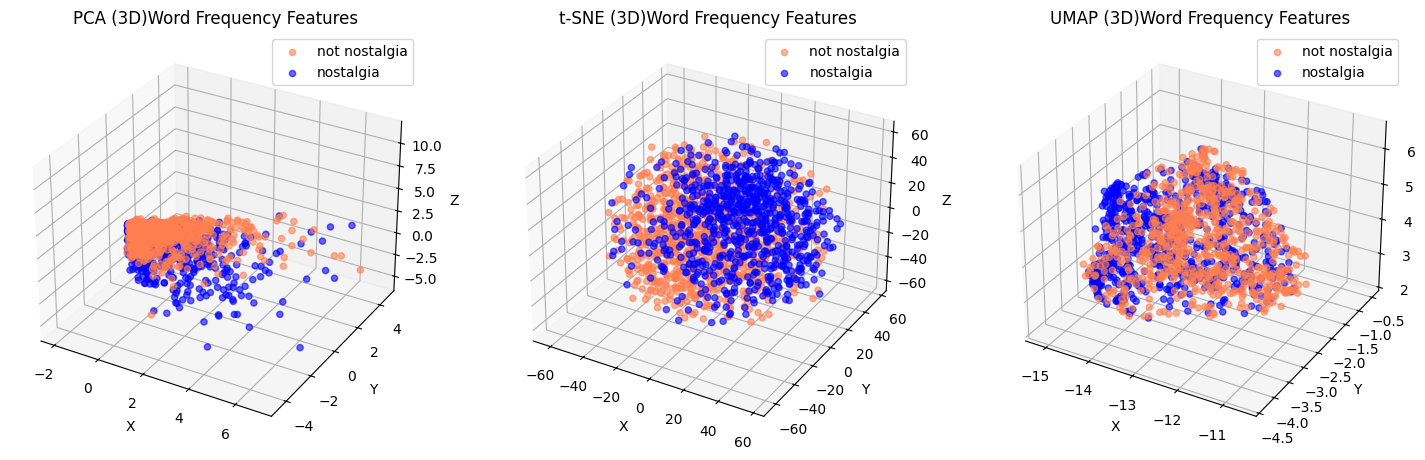

In [236]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Define a function to create 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title, col, categories):
    for c, color in zip(categories, col):
        xs = X_reduced[X['sentiment'] == c][:, 0]
        ys = X_reduced[X['sentiment'] == c][:, 1]
        zs = X_reduced[X['sentiment'] == c][:, 2]
        ax.scatter(xs, ys, zs, c=color, label=c, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Prepare colors and categories
col = ['coral', 'blue', 'black', 'orange']  # You can adjust these colors according to your categories
categories = X['sentiment'].unique()

# Step 1: Dimensionality reduction using PCA in 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_counts.toarray())

# Step 2: Dimensionality reduction using t-SNE in 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne.fit_transform(X_counts.toarray())

# Step 3: Dimensionality reduction using UMAP in 3D
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_model.fit_transform(X_counts.toarray())

# Create subplots for PCA, t-SNE, and UMAP in 3D
fig = plt.figure(figsize=(18, 12))

# First plot for PCA
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_3d, 'PCA (3D)Word Frequency Features', col, categories)

# Second plot for t-SNE
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_3d, 't-SNE (3D)Word Frequency Features', col, categories)

# Third plot for UMAP
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_3d, 'UMAP (3D)Word Frequency Features', col, categories)

plt.show()


### The following is the content of DM2024-Lab1-Master Frequent Pattern Mining

In [237]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.007585048675537109


In [238]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [239]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.005617618560791016


In [240]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142    classic       21
143     lyrics       21

[144 rows x 2 columns]

Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on **unique patterns** is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

In [241]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127     will       28
125     ever       28
126    would       28
123       or       26
119      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


We observed a significant number of patterns that were common across different categories, which is why we chose to discard them. The next step is to integrate these now category-specific patterns into our data. How will we do this? By converting the patterns into binary data within the columns of our document-term matrix. Specifically, we will check each document for the presence of each pattern. If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'. This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

In [242]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  almost  end  family  \
0      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0    0       0   

      ones  things  others  pure  please  though  wonder  
0        0       0       0     0       0       0       0  
1        0       0       0     0       0       0       0  
2        0       0       0     0       0       0       0  
3        0       0       0     0       0       0       0  
4        0       0       0     0       0       0       0  
...    ...     ...     ...   ...     ...     ...     ...  
1495     0       0       0     0       0       0       0  
1496     0       0       0     0       0       0       0  
1497     0       0       0     0       0       0       0  
1498     0       0       1     0       0       0       0  
1499     0       0       0     0       0       0       0  

[1500 rows x 3950 columns]

In [243]:
# Import necessary libraries
# Import implementations from PAMI library
import pandas as pd
import time
from PAMI.frequentPattern.topk import FAE  

# Initialize parameters
k_values = [500, 600,870]
input_file = 'td_freq_db_nostalgia.csv'
num_transactions = len(df)  
# Step 1: FAE Top-K Analysis using FAE from PAMI library
for k in k_values:
    print(f"\nRunning FAE Top-K with k={k}")
    start_time = time.time()
    obj_fae = FAE.FAE(iFile=input_file, k=k)  
    obj_fae.mine()
    frequent_patterns_fae = obj_fae.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequent_patterns_fae)))
    print('Runtime: ' + str(obj_fae.getRuntime()))


Running FAE Top-K with k=500
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.052524566650390625

Running FAE Top-K with k=600
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 600
Runtime: 0.07246923446655273

Running FAE Top-K with k=870
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 870
Runtime: 0.25380539894104004


---

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

So, let's experiment with something interesting, from our previous work we have our data with only the document-term frequency data and also the one with both the document-term frequency and the pattern derived data, let's try to create a 2D plot after applying these algorithms to our dataframes and see what comes out.

In [244]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [245]:
X_pca_tdm.shape

(1500, 2)

In [246]:
X_tsne_tdm.shape

(1500, 2)

In [247]:
X_umap_tdm.shape

(1500, 2)

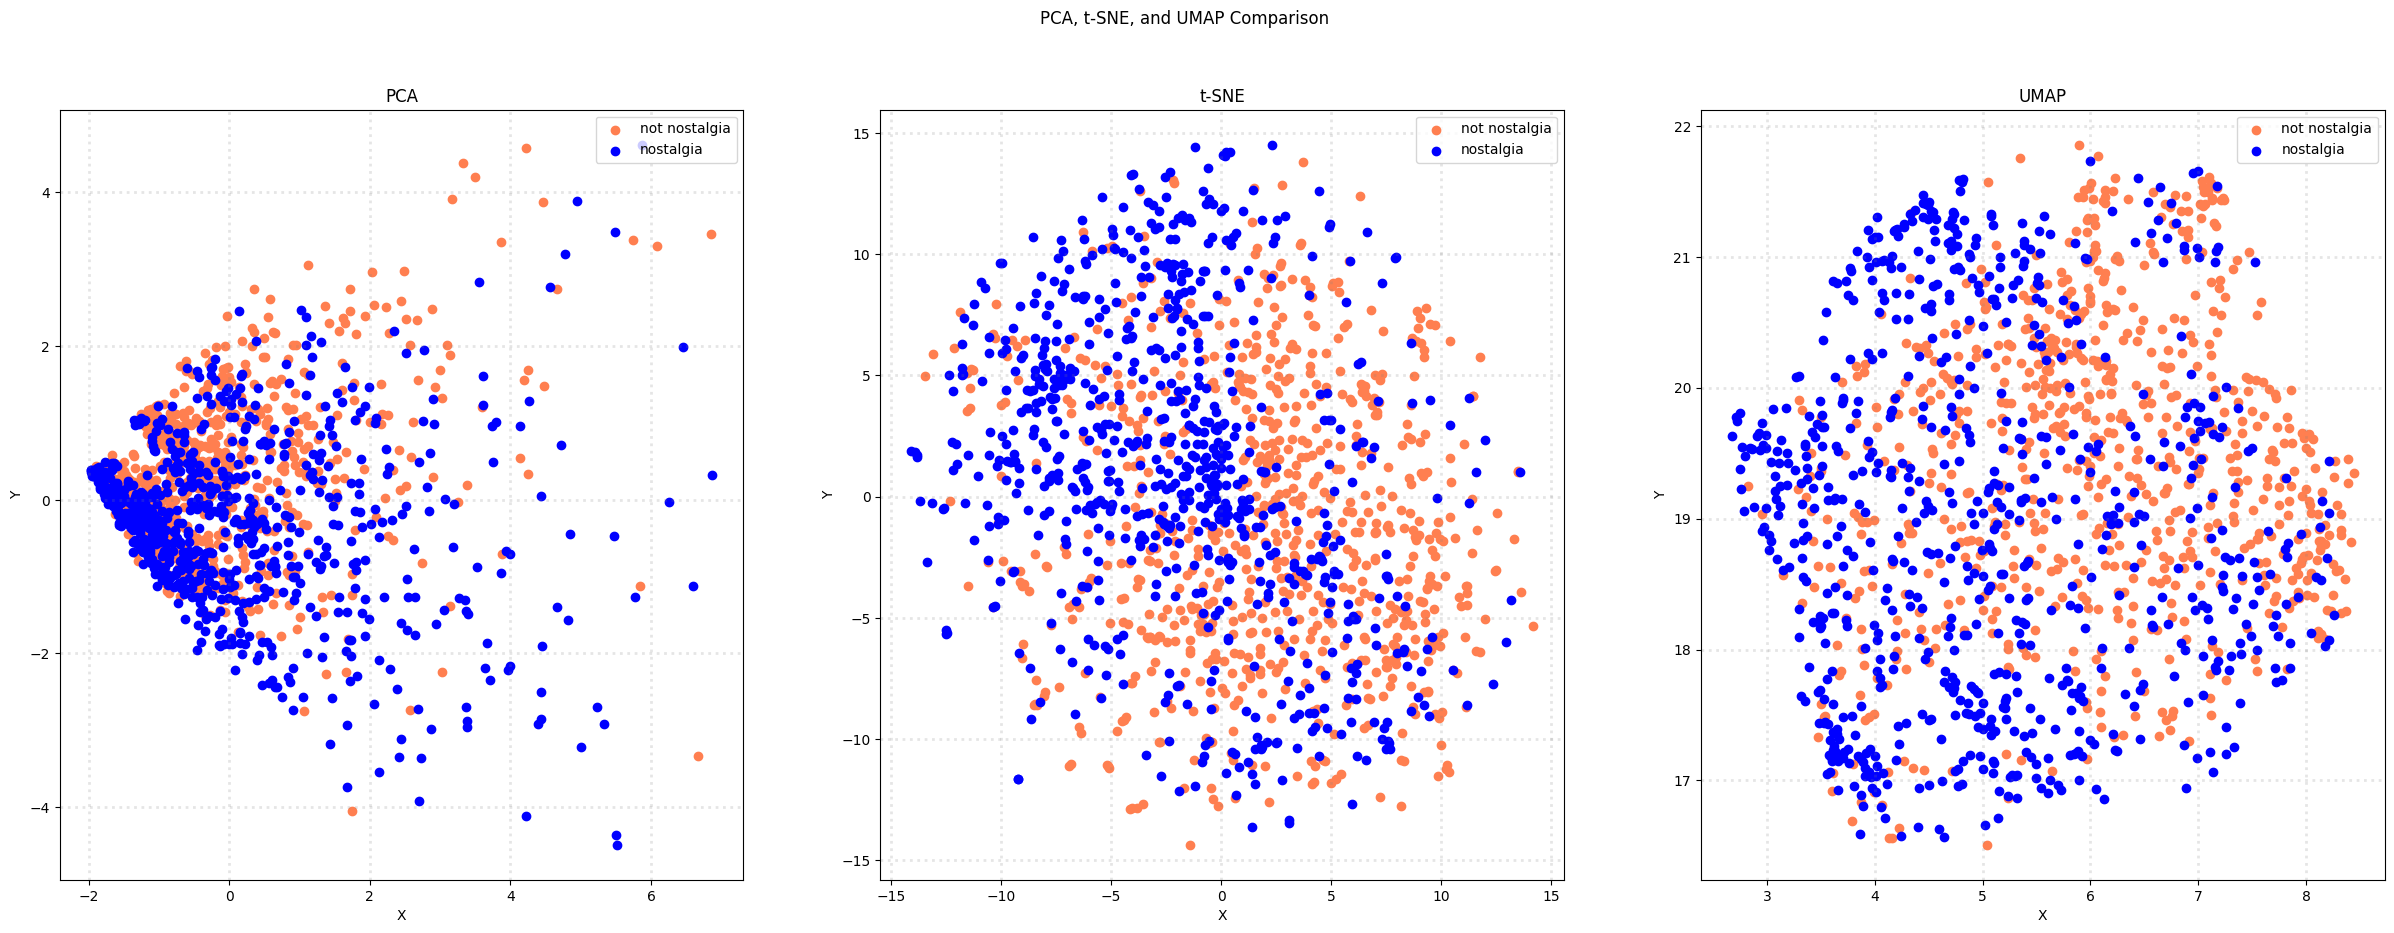

In [248]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

Now let's try in tandem with our pattern augmented data:

In [249]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

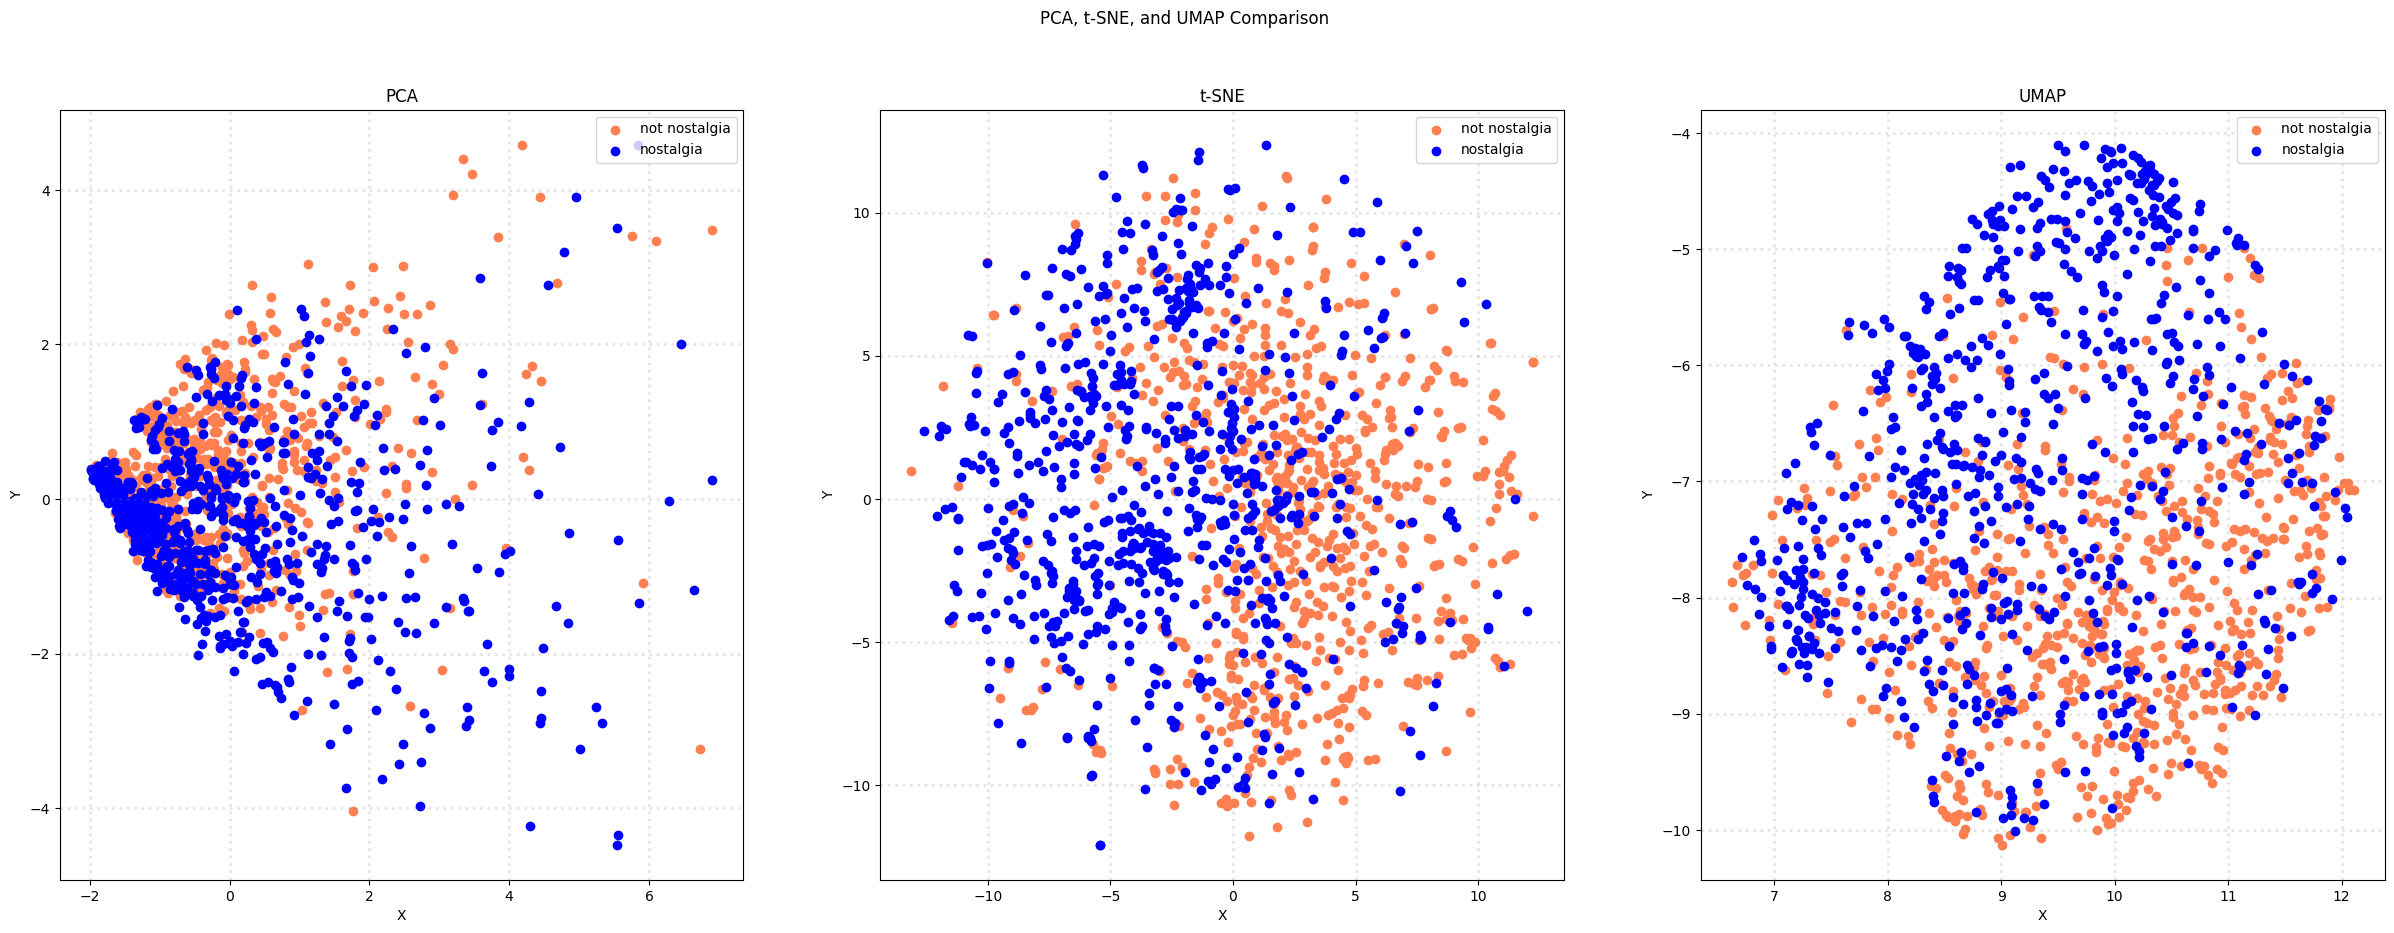

In [250]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

We can see that our PCA visualization hasn't changed much from the previous version. This is likely because the original document-term matrix still dominates what the algorithm captures, overshadowing the new binary pattern data we added.

Looking at the t-SNE graph, it might seem different at first glance. However, upon closer inspection, it's almost the same but mirrored along the y-axis, with only slight changes in how the data points are placed. This similarity might be due to the stability of the t-SNE algorithm. Even small changes in the data can result in embeddings that look different but are structurally similar, indicating that the binary patterns may not have significantly altered the relationships among the data points in high-dimensional space.

The UMAP visualization shows the most noticeable changes—it appears more compact. This compactness could be because UMAP uses a more complex distance metric, which might be making it easier to see differences between closer and further points. The binary patterns could also be helping to reduce noise within categories, resulting in clearer, more coherent groups. However, the categories still appear quite mixed together.

Remember, just because you can't see clear groups in these visualizations doesn’t mean that a machine learning model won’t be able to classify the data correctly. These techniques are mainly used to help us see and understand complex data in a simpler two or three-dimensional space. However, they have their limits and might not show everything a computer model can find in the data. So, while these tools are great for getting a first look at your data, always use more methods and analyses to get the full picture.

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [251]:
# Apply PCA, t-SNE, and UMAP to the data, but reduce to 3 dimensions instead of 2
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)


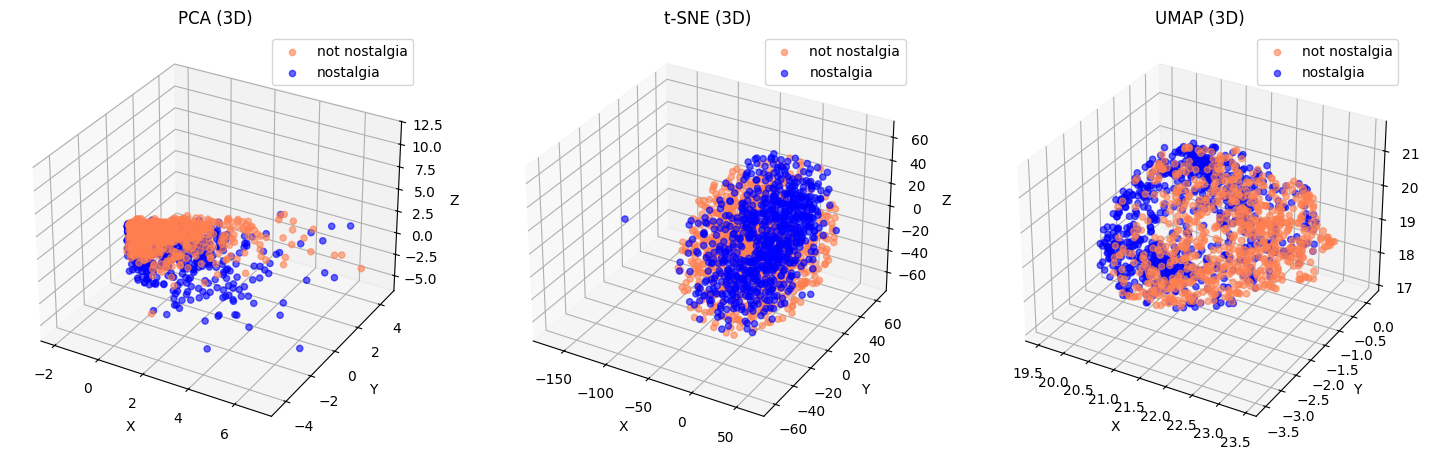

In [252]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a function to create 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title, col, categories):
    for c, color in zip(categories, col):
        xs = X_reduced[X['sentiment'] == c][:, 0]
        ys = X_reduced[X['sentiment'] == c][:, 1]
        zs = X_reduced[X['sentiment'] == c][:, 2]
        ax.scatter(xs, ys, zs, c=color, label=c, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

# Prepare colors and categories
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique()

# Create subplots for PCA, t-SNE, and UMAP in 3D
fig = plt.figure(figsize=(18, 12))

# First plot for PCA
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_3d, 'PCA (3D)', col, categories)

# Second plot for t-SNE
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_3d, 't-SNE (3D)', col, categories)

# Third plot for UMAP
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_3d, 'UMAP (3D)', col, categories)

plt.show()


---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [253]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [254]:
mlb = preprocessing.LabelBinarizer()

In [255]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [256]:
X['bin_category'] = mlb.transform(X['sentiment']).tolist()

In [257]:
X[0:9]

text      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {the, all, Reeves, voice, now., of, but,, He, ...          [1]  
1  {voice, of, ever, forgotten, to, when, listene...          [0]  
2  {the, Reeves, find, people, of, Always, had, h...          [0]  
3  {the, all, is, of, from, pray, later, my, tour...          [1]  
4  {mum, him, listening, his, who, of, played, ev...          [0]  
5  {voice, of, Now, over, to, used, souls., fear,...          [0]  
6  {the, loved, how, things., to, when, was, I, t...          [0]  
7  {the, Reeves, since, to, LISTENED, childhood, ...          [0]  
8        {always, you, Wherever, are, in, my, heart}          [1]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 19 (take home):**It is not important in step 3
Try to generate the binarization using the `category_name` column instead. Does it work?

In [258]:
mlb.fit(X['sentiment'])  
X['bin_category_name'] = mlb.transform(X['sentiment']).tolist()  
# Check the results of the first 9 rows
X[0:9]
#do the same thing

text      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  \
0  {the, all, Reeves, voice, now., of, but,, He, ...          [1]   
1  {voice, of, ever, forgotten, to, when, listene...          [0]   
2  {the, Reeves, find, people, of, Always, had, h...          [0]   
3  {the, all, is, of, from, pray, later, my, tour...          [1]   
4  {mum, him, listening, his, who, of, played, ev...          [0]   
5  {voice, of, Now, over, to, used, souls., fear,...          [0]   
6  {the, loved, how, things., to, when, was, I, t...          [0]   
7  {the, Reeves, since, to, LISTENED, childhood, ...          [0]   
8        {always, you, Wherever, are, in, my, heart}          [1]   

  bin_category_name  
0               [1]  
1               [0]  
2               [0]  
3               [1]  
4               [0]  
5               [0]  
6               [0]  
7               [0]  
8               [1]

---

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [259]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [260]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [261]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [262]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_11192\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_11192\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# 7. Data Classification (I have already done this before.)
Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology.
Among various classification techniques, the **Naive Bayes classifier** is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

- **Multinomial Naive Bayes:**
    The Multinomial Naive Bayes classifier works by assuming that the features (words or terms in text data) follow a multinomial distribution. In simple terms, it calculates the probability of a document belonging to a particular category based on the frequency of words in that document, assuming independence between words (the "naive" part of Naive Bayes). Despite this assumption, it often performs remarkably well for text data, especially when working with word count features. Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue. For more information you can go to: [NB Classifier](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
    
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

As you might have seen from the first model, the document-term matrix data already allows the model to classify it with great accuracy, but if we add the additional information provided by the patterns then we see a slightly better result to an already high score. While the document-term matrix captures individual word frequencies, the pattern matrix adds valuable information about co-occurrences and higher-level word combinations, providing complementary insights. This enhanced feature set allows the classifier to better differentiate between categories, particularly in cases where word frequencies alone might not be enough. 

So, now you know the importance of feature creation and pattern mining, it can give you an edge at the time of data classification.

-----

## 8. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)

## Step 4: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent
parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade
## Below is a comparison of filtered and unfiltered images.
It can be seen that the accuracy of the word frequency features after filtering is lower.It would be better if this part is not filtered.  
The left side is removed from the bottom 1.0% words and the top 5% words.  
The right side is unfiltered.

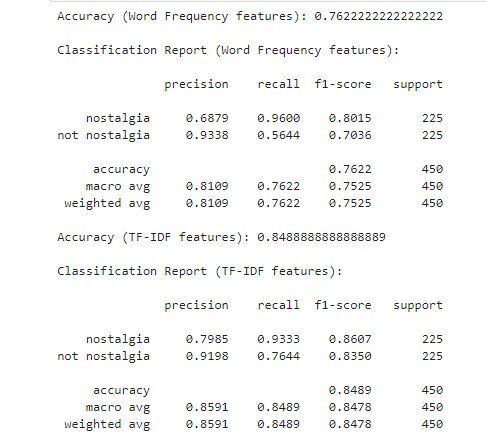
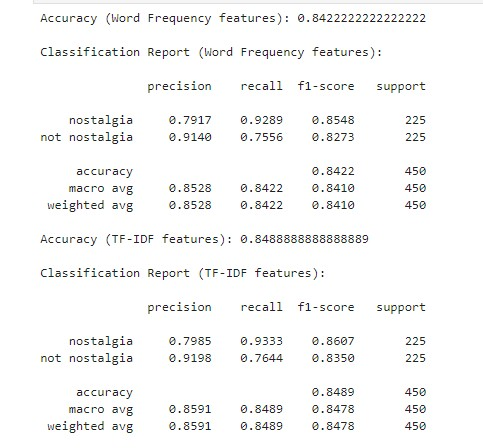

Comparison of Filtered and Unfiltered Results might be because: High-frequency words, although common, may still carry important information in sentiment classification. For example, common emotional terms (such as "nostalgia" itself) may frequently appear in the nostalgia category. Filtering out these words leads to the loss of key information. Low-frequency words, while rare, might be associated with specific emotional reactions. Removing these words could also cause the model to lose its ability to differentiate between different sentiments. 